In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.0 MB/s eta 0:00:00


In [3]:
database = 'imdb_top_1000.csv'

# Carrega o CSV para um DataFrame do Pandas
df = pd.read_csv(database)


print("Arquivo carregado com sucesso!")
# Exibe as 5 primeiras linhas para confirmar que tudo deu certo
df.head()

Arquivo carregado com sucesso!


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
# Verificar colunas
print("Colunas:", df.columns)
print("Número de colunas:", len(df.columns))

Colunas: Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')
Número de colunas: 16


In [4]:
# Cria uma lista com os nomes das colunas para manter
colunas_para_manter = [
    'Series_Title',
    'Released_Year',
    'Genre',
    'IMDB_Rating',
    'Director',
    'Star1',
    'Star2',
    'Star3',
    'Star4',
    'Gross'
]

# Cria um novo DataFrame contendo apenas essas colunas
df_essencial = df[colunas_para_manter]

# Para verificar as novas colunas e a quantidade
print("\nNovas colunas:", df_essencial.columns)
print("Número de colunas:", len(df_essencial.columns))
print("-"*60)

# Verifica o resultado, exibindo as primeiras linhas do novo DataFrame
print("DataFrame apenas com as colunas necessárias:")
df_essencial.head()




Novas colunas: Index(['Series_Title', 'Released_Year', 'Genre', 'IMDB_Rating', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'Gross'],
      dtype='object')
Número de colunas: 10
------------------------------------------------------------
DataFrame apenas com as colunas necessárias:


,Series_Title,Released_Year,Genre,IMDB_Rating,Director,Star1,Star2,Star3,Star4,Gross
0,The Shawshank Redemption,1994,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"28,341,469"
1,The Godfather,1972,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"134,966,411"
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"534,858,444"
3,The Godfather: Part II,1974,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"57,300,000"
4,12 Angry Men,1957,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"4,360,000"


In [5]:
# # Criar uma cópia do DataFrame para garantir que não alteramos o original
# df_tratado = df_essencial.copy()

# # Renomear as colunas para o padrão minúsculas com underscore
# df_tratado = df_tratado.rename(columns={
#     'Series_Title': 'series_title',
#     'Released_Year': 'released_year',
#     'Genre': 'genre',
#     'IMDB_Rating': 'imdb_rating',
#     'Director': 'director',
#     'Star1': 'star1',
#     'Star2': 'star2',
#     'Star3': 'star3',
#     'Star4': 'star4',
#     'Gross': 'gross'
# })

# # Remover linhas onde dados essenciais para o grafo estão nulos
# colunas_essenciais = ['series_title', 'director', 'star1', 'star2', 'star3', 'star4']
# df_tratado.dropna(subset=colunas_essenciais, inplace=True)

# # Limpar e converter os tipos de dados

# # Padronizar as colunas de texto (título, diretor, atores, gênero)
# # Remover espaços extras no início/fim e converter para minúsculas para consistência
# colunas_texto = ['series_title', 'genre', 'director', 'star1', 'star2', 'star3', 'star4']
# for col in colunas_texto:
#     df_tratado[col] = df_tratado[col].astype(str).str.strip().str.lower()

# # Limpar e converter a coluna 'gross' (Bilheteria)

# if 'gross' in df_tratado.columns:
#     df_tratado['gross'] = df_tratado['gross'].str.replace(',', '', regex=False)
#     df_tratado['gross'] = pd.to_numeric(df_tratado['gross'], errors='coerce').fillna(0).astype('int64')

# # Limpar e converter a coluna 'released_year' (Ano de Lançamento)
# # Esta coluna pode ter valores não numéricos. Forçando a conversão para número.
# # 'errors='coerce'' transformará qualquer valor inválido (ex: texto) em Nulo (NaN).
# df_tratado['released_year'] = pd.to_numeric(df_tratado['released_year'], errors='coerce')
# # removemos as linhas que ficaram com o ano nulo
# df_tratado.dropna(subset=['released_year'], inplace=True)
# # Converte para inteiro para remover o ".0"
# df_tratado['released_year'] = df_tratado['released_year'].astype(int)

# # Verificando o resultado final
# print("--- Informações do DataFrame após o tratamento ---")
# df_tratado.info()

# print("\n\n--- 5 Primeiras Linhas do DataFrame Tratado ---")
# df_tratado.head()

--- Informações do DataFrame após o tratamento ---
<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   series_title   999 non-null    object 
 1   released_year  999 non-null    int64  
 2   genre          999 non-null    object 
 3   imdb_rating    999 non-null    float64
 4   director       999 non-null    object 
 5   star1          999 non-null    object 
 6   star2          999 non-null    object 
 7   star3          999 non-null    object 
 8   star4          999 non-null    object 
 9   gross          999 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 85.9+ KB


--- 5 Primeiras Linhas do DataFrame Tratado ---


,series_title,released_year,genre,imdb_rating,director,star1,star2,star3,star4,gross
0,the shawshank redemption,1994,drama,9.3,frank darabont,tim robbins,morgan freeman,bob gunton,william sadler,28341469
1,the godfather,1972,"crime, drama",9.2,francis ford coppola,marlon brando,al pacino,james caan,diane keaton,134966411
2,the dark knight,2008,"action, crime, drama",9.0,christopher nolan,christian bale,heath ledger,aaron eckhart,michael caine,534858444
3,the godfather: part ii,1974,"crime, drama",9.0,francis ford coppola,al pacino,robert de niro,robert duvall,diane keaton,57300000
4,12 angry men,1957,"crime, drama",9.0,sidney lumet,henry fonda,lee j. cobb,martin balsam,john fiedler,4360000


In [13]:
# --- Selecionando as colunas essenciais ---
colunas_para_grafo = [
    'Series_Title',
    'Director',
    'Star1',
    'Star2',
    'Star3',
    'Star4'
]

# Um novo DataFrame 'df_focado' contendo apenas as colunas essenciais.
df_tratado = df[colunas_para_grafo].copy()


# --- Renomear as colunas selecionadas ---
df_tratado = df_tratado.rename(columns={
    'Series_Title': 'series_title',
    'Director': 'director',
    'Star1': 'star1',
    'Star2': 'star2',
    'Star3': 'star3',
    'Star4': 'star4'
})


# --- Remover linhas com qualquer valor nulo ---
df_tratado.dropna(inplace=True)


# --- Padronizar todas as colunas de texto ---
for col in df_tratado.columns:
    df_tratado[col] = df_tratado[col].astype(str).str.strip().str.lower()


print("--- Informações do DataFrame após o tratamento ---")
df_tratado.info()

print("\n\n--- 5 Primeiras Linhas do DataFrame tratado---")
df_tratado.head()

--- Informações do DataFrame após o tratamento ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   series_title  1000 non-null   object
 1   director      1000 non-null   object
 2   star1         1000 non-null   object
 3   star2         1000 non-null   object
 4   star3         1000 non-null   object
 5   star4         1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


--- 5 Primeiras Linhas do DataFrame tratado---


,series_title,director,star1,star2,star3,star4
0,the shawshank redemption,frank darabont,tim robbins,morgan freeman,bob gunton,william sadler
1,the godfather,francis ford coppola,marlon brando,al pacino,james caan,diane keaton
2,the dark knight,christopher nolan,christian bale,heath ledger,aaron eckhart,michael caine
3,the godfather: part ii,francis ford coppola,al pacino,robert de niro,robert duvall,diane keaton
4,12 angry men,sidney lumet,henry fonda,lee j. cobb,martin balsam,john fiedler


In [8]:
# --- Contagem de aparições de cada DIRETOR ---
print("--- Contagem de Filmes por Diretor ---")
contagem_diretores = df_tratado['director'].value_counts()

# lista completa de diretores e quantos filmes cada um dirigiu.
display(contagem_diretores)


# --- Contagem de aparições de cada ATOR ---
# precisamos juntar todas as colunas 'star' em uma única lista
# O método pd.concat junta as quatro colunas (star1, star2, star3, star4) em uma série única de nomes.
atores_todos = pd.concat([
    df_tratado['star1'],
    df_tratado['star2'],
    df_tratado['star3'],
    df_tratado['star4']
])

print("\n\n--- Contagem de Aparições por Ator (em qualquer posição de estrela) ---")
contagem_atores = atores_todos.value_counts()

# lista de atores
display(contagem_atores)


# lista de atores considerando a posição
contagem_star1 = df_tratado['star1'].value_counts()
display(contagem_star1)
contagem_star2 = df_tratado['star2'].value_counts()
display(contagem_star2)
contagem_star3 = df_tratado['star3'].value_counts()
display(contagem_star3)
contagem_star4 = df_tratado['star4'].value_counts()
display(contagem_star4)

--- Contagem de Filmes por Diretor ---


,count
director,
alfred hitchcock,14
steven spielberg,13
hayao miyazaki,11
akira kurosawa,10
martin scorsese,10
...,...
kinji fukasaku,1
eric bress,1
thomas kail,1




--- Contagem de Aparições por Ator (em qualquer posição de estrela) ---


,count
robert de niro,17
tom hanks,14
al pacino,13
clint eastwood,12
brad pitt,12
...,...
michelle reis,1
eleanor bron,1
jacques villeret,1
milla jovovich,1


,count
star1,
tom hanks,12
robert de niro,11
al pacino,10
clint eastwood,10
humphrey bogart,9
...,...
junko iwao,1
fernanda montenegro,1
eli marienthal,1


,count
star2,
emma watson,7
matt damon,5
ian mckellen,4
brad pitt,4
kate winslet,4
...,...
marie-laure dougnac,1
joe pesci,1
meg ryan,1


,count
star3,
rupert grint,5
carrie fisher,4
scarlett johansson,4
john goodman,4
samuel l. jackson,4
...,...
daniel stern,1
andy garcia,1
leandro firmino,1


,count
star4,
michael caine,4
catherine keener,3
mark ruffalo,3
michael gambon,2
domhnall gleeson,2
...,...
merila zare'i,1
dibyendu bhattacharya,1
ka tung lam,1


In [9]:
from itertools import combinations


G_actors = nx.Graph()

# Iterar sobre cada filme no DataFrame
for index, row in df_tratado.iterrows():
    # Pega a lista de atores do filme
    actors = [row['star1'], row['star2'], row['star3'], row['star4']]

    # Cria conexões entre todos os pares de atores do filme
    for actor1, actor2 in combinations(actors, 2):
        # Adiciona a aresta ponderada
        # Se a aresta já existe, aumenta o peso. Se não, cria com peso 1.
        if G_actors.has_edge(actor1, actor2):
            G_actors[actor1][actor2]['weight'] += 1
        else:
            G_actors.add_edge(actor1, actor2, weight=1)


print("--- Grafo de Colaboração de Atores Criado ---")
print(f"Número de nós (atores): {G_actors.number_of_nodes()}")
print(f"Número de arestas (colaborações únicas): {G_actors.number_of_edges()}")

--- Grafo de Colaboração de Atores Criado ---
Número de nós (atores): 2709
Número de arestas (colaborações únicas): 5837


In [14]:
# O grau aqui não considera os pesos, apenas o número de colaboradores distintos.
degrees = dict(G_actors.degree())

# Ordenar atores pelo número de colaboradores
sorted_degrees = sorted(degrees.items(), key=lambda item: item[1], reverse=True)

print("\n--- Top 10 Atores com Mais Colaboradores (Maior Grau) ---")
for actor, degree in sorted_degrees[:10]:
    print(f"- {actor.title()}: Colaborou com {degree} outros atores.")


--- Top 10 Atores com Mais Colaboradores (Maior Grau) ---
- Robert De Niro: Colaborou com 45 outros atores.
- Tom Hanks: Colaborou com 38 outros atores.
- Brad Pitt: Colaborou com 36 outros atores.
- Al Pacino: Colaborou com 35 outros atores.
- Clint Eastwood: Colaborou com 33 outros atores.
- Leonardo Dicaprio: Colaborou com 32 outros atores.
- Christian Bale: Colaborou com 31 outros atores.
- Matt Damon: Colaborou com 31 outros atores.
- James Stewart: Colaborou com 30 outros atores.
- Johnny Depp: Colaborou com 27 outros atores.


In [15]:
# Pegar todas as arestas com seus pesos
weights = nx.get_edge_attributes(G_actors, 'weight')

# Ordenar as parcerias pela força (peso)
sorted_weights = sorted(weights.items(), key=lambda item: item[1], reverse=True)

print("\n--- Top 10 Parcerias Mais Frequentes (Arestas com Maior Peso) ---")
for (actor1, actor2), weight in sorted_weights[:10]:
    print(f"- {actor1.title()} & {actor2.title()}: Trabalharam juntos {weight} vezes.")


--- Top 10 Parcerias Mais Frequentes (Arestas com Maior Peso) ---
- Daniel Radcliffe & Rupert Grint: Trabalharam juntos 6 vezes.
- Daniel Radcliffe & Emma Watson: Trabalharam juntos 5 vezes.
- Emma Watson & Rupert Grint: Trabalharam juntos 5 vezes.
- Robert De Niro & Joe Pesci: Trabalharam juntos 4 vezes.
- Tom Hanks & Tim Allen: Trabalharam juntos 4 vezes.
- Al Pacino & Diane Keaton: Trabalharam juntos 3 vezes.
- Al Pacino & Robert De Niro: Trabalharam juntos 3 vezes.
- Diane Keaton & Woody Allen: Trabalharam juntos 3 vezes.
- Christian Bale & Michael Caine: Trabalharam juntos 3 vezes.
- Elijah Wood & Ian Mckellen: Trabalharam juntos 3 vezes.


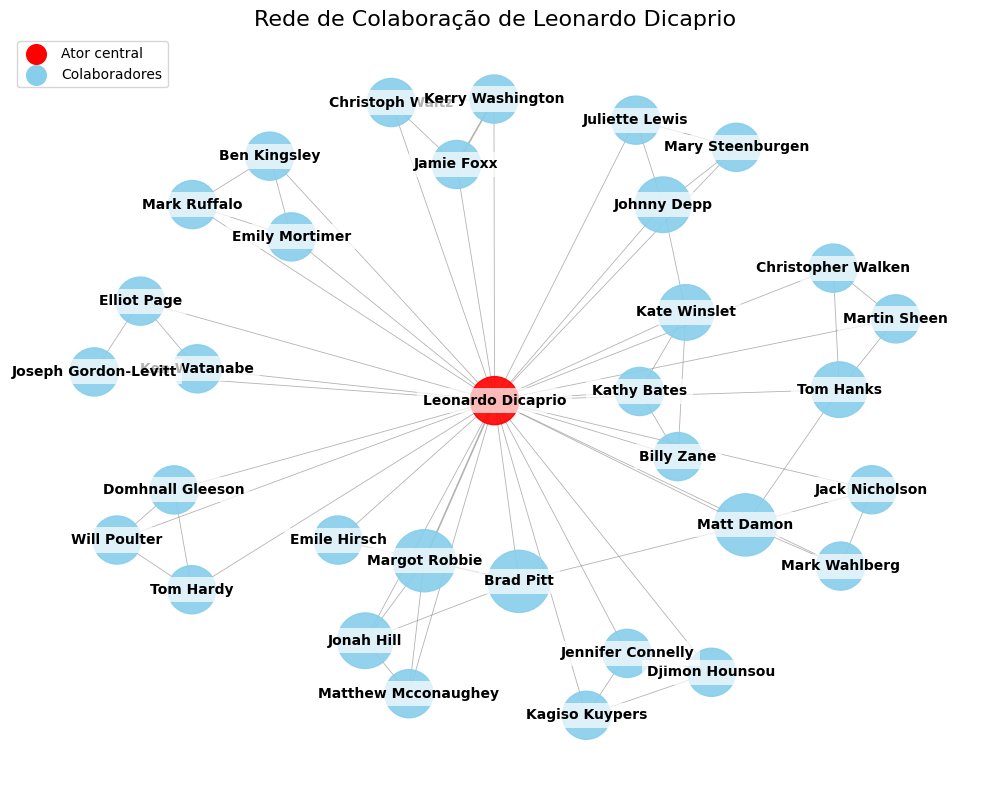

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

ator_central = 'leonardo dicaprio'

if ator_central not in G_actors:
    print(f"Erro: O ator '{ator_central.title()}' não foi encontrado no grafo.")
else:
    ego_graph = nx.ego_graph(G_actors, ator_central, radius=1)

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(ego_graph, seed=42, k=0.5)

    # Nó central destacado
    node_sizes = []
    node_colors = []
    for n in ego_graph.nodes():
        if n == ator_central:
            node_sizes.append(1200)
            node_colors.append("red")
        else:
            node_sizes.append(ego_graph.degree(n) * 400)
            node_colors.append("skyblue")

    # Arestas proporcionais ao peso
    edge_widths = [data['weight'] * 0.6 for _, _, data in ego_graph.edges(data=True)]

    # Desenho do grafo
    nx.draw_networkx_nodes(ego_graph, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
    nx.draw_networkx_edges(ego_graph, pos, width=edge_widths, edge_color="gray", alpha=0.6)

    # Labels com fundo branco
    nx.draw_networkx_labels(
        ego_graph, pos,
        labels={n: n.title() for n in ego_graph.nodes()},
        font_size=10,
        font_weight="bold",
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)
    )

    # Legenda
    plt.scatter([], [], c="red", s=200, label="Ator central")
    plt.scatter([], [], c="skyblue", s=200, label="Colaboradores")
    plt.legend(scatterpoints=1, frameon=True, loc="upper left")

    plt.title(f"Rede de Colaboração de {ator_central.title()}", size=16)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

Preparando a visualização do grafo completo... Isso pode levar um minuto.


/tmp/ipython-input-300346008.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


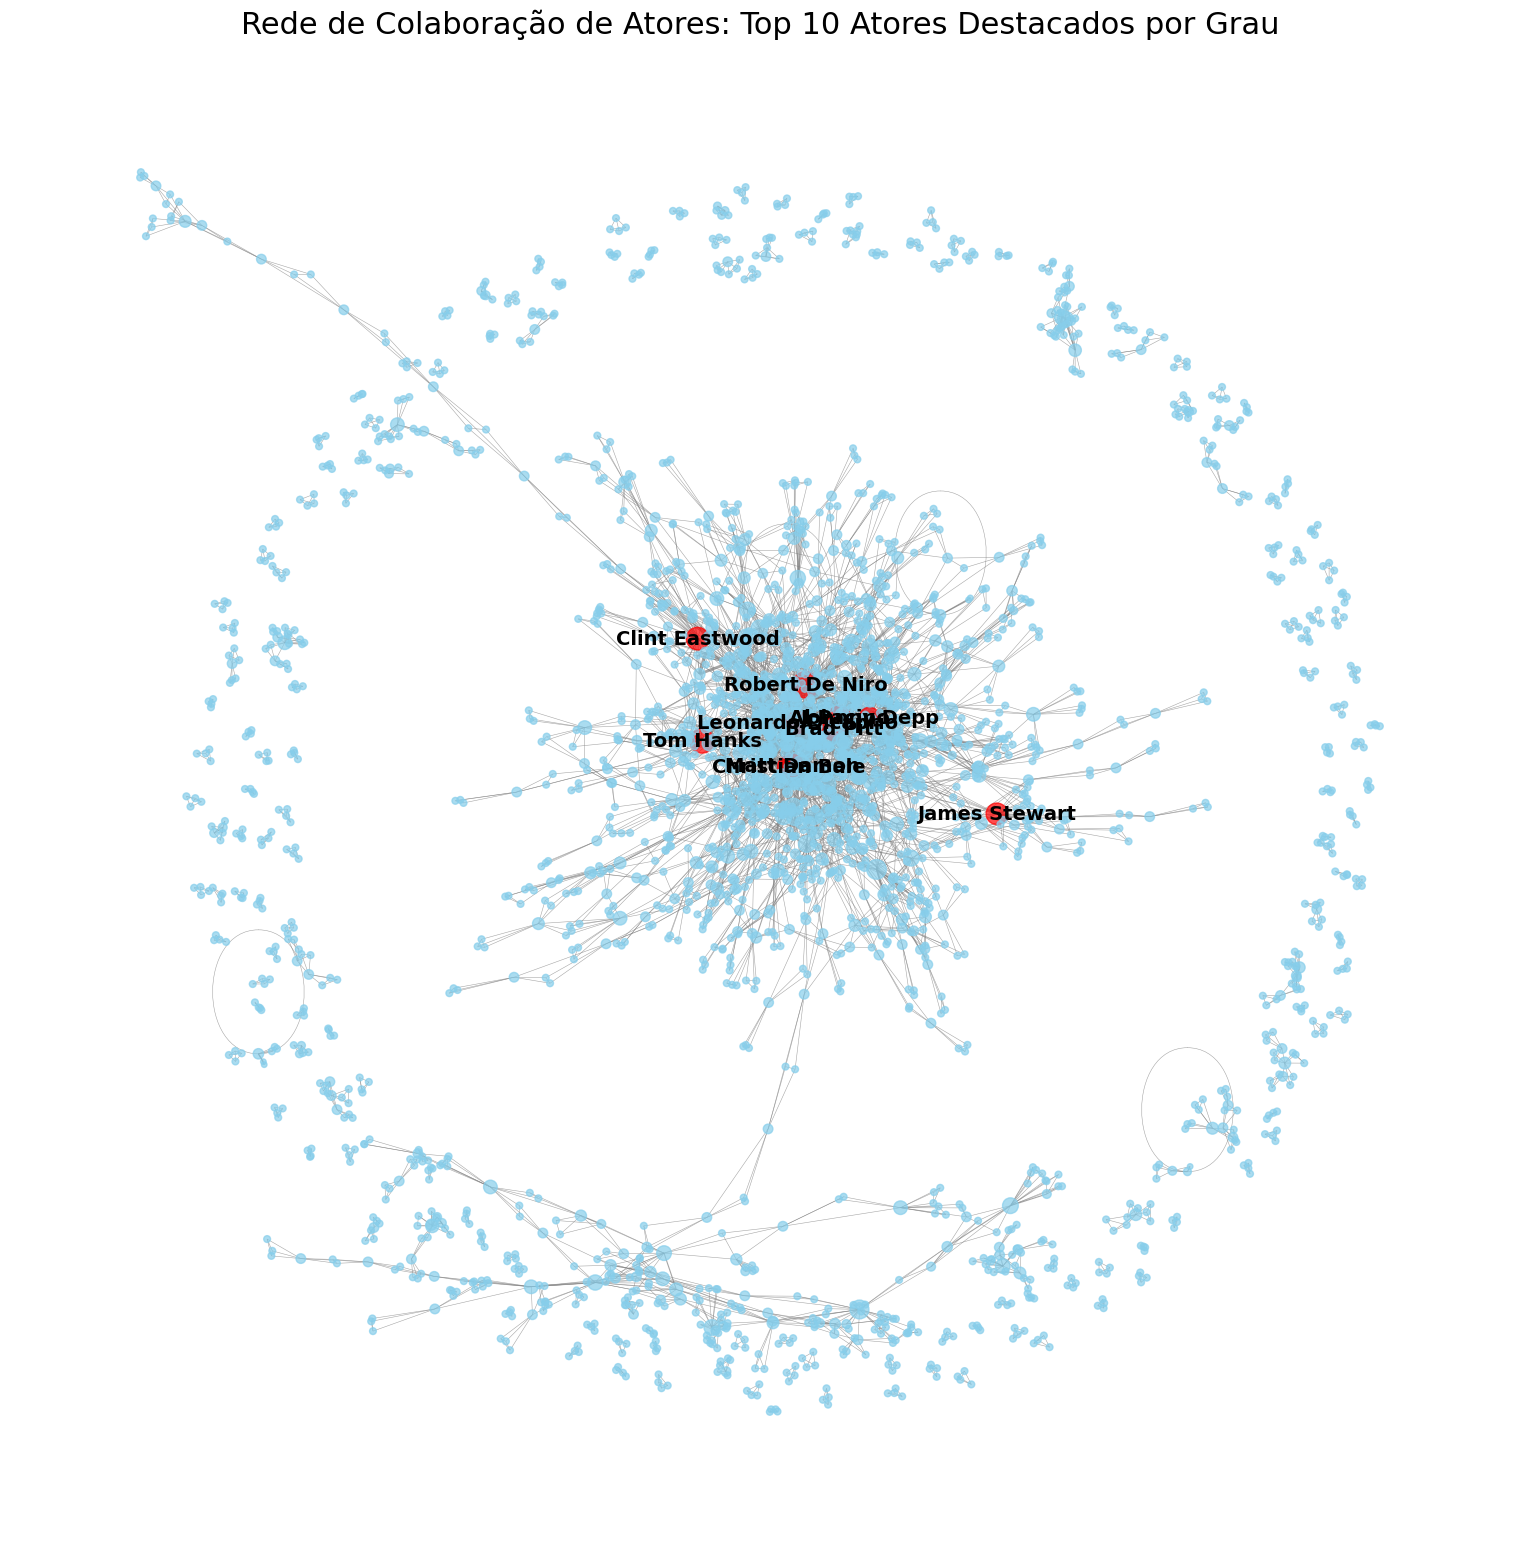

In [16]:
import matplotlib.pyplot as plt
import networkx as nx


print("Preparando a visualização do grafo completo... Isso pode levar um minuto.")


# Layout fixo para manter a consistência. O 'seed' garante que a imagem seja a mesma sempre.
# k=0.1 ajuda a espalhar mais os nós em grafos densos.
pos = nx.spring_layout(G_actors, seed=42, k=0.15)

# Tamanho dos nós proporcional ao grau (número de colaboradores)
# Multiplicamos por um valor pequeno para não ficarem gigantes.
node_sizes = [G_actors.degree(n) * 8 for n in G_actors.nodes()]

# Largura das arestas proporcional ao 'weight' (número de filmes juntos)
edge_widths = [d.get('weight', 1) * 0.4 for _, _, d in G_actors.edges(data=True)]

# Encontrar os 10 nós com maior grau para destacar
top_n = 10
top_nodes = sorted(G_actors.degree, key=lambda x: x[1], reverse=True)[:top_n]
# Cria um dicionário apenas com os rótulos desses top 20 atores
top_labels = {node: node.title() for node, _ in top_nodes}

# Marca esses nós em uma cor diferente
node_colors = ["red" if node in top_labels else "skyblue" for node in G_actors.nodes()]

#  Plotar o grafo
plt.figure(figsize=(15, 15))
nx.draw(
    G_actors,
    pos,
    with_labels=False,
    node_size=node_sizes,
    edge_color="gray",
    width=edge_widths,
    node_color=node_colors,
    alpha=0.7
)

# Adiciona rótulos (nomes) apenas para os top 20
nx.draw_networkx_labels(G_actors, pos, labels=top_labels, font_size=14, font_weight="bold", font_color="black")

plt.title(f"Rede de Colaboração de Atores: Top {top_n} Atores Destacados por Grau", fontsize=22)
plt.axis("off")
plt.tight_layout()
plt.show()

Preparando o subgrafo com o Top 10 e seus colaboradores...
Grafo original: 2709 nós.
Subgrafo criado: 283 nós.


/tmp/ipython-input-2181085539.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


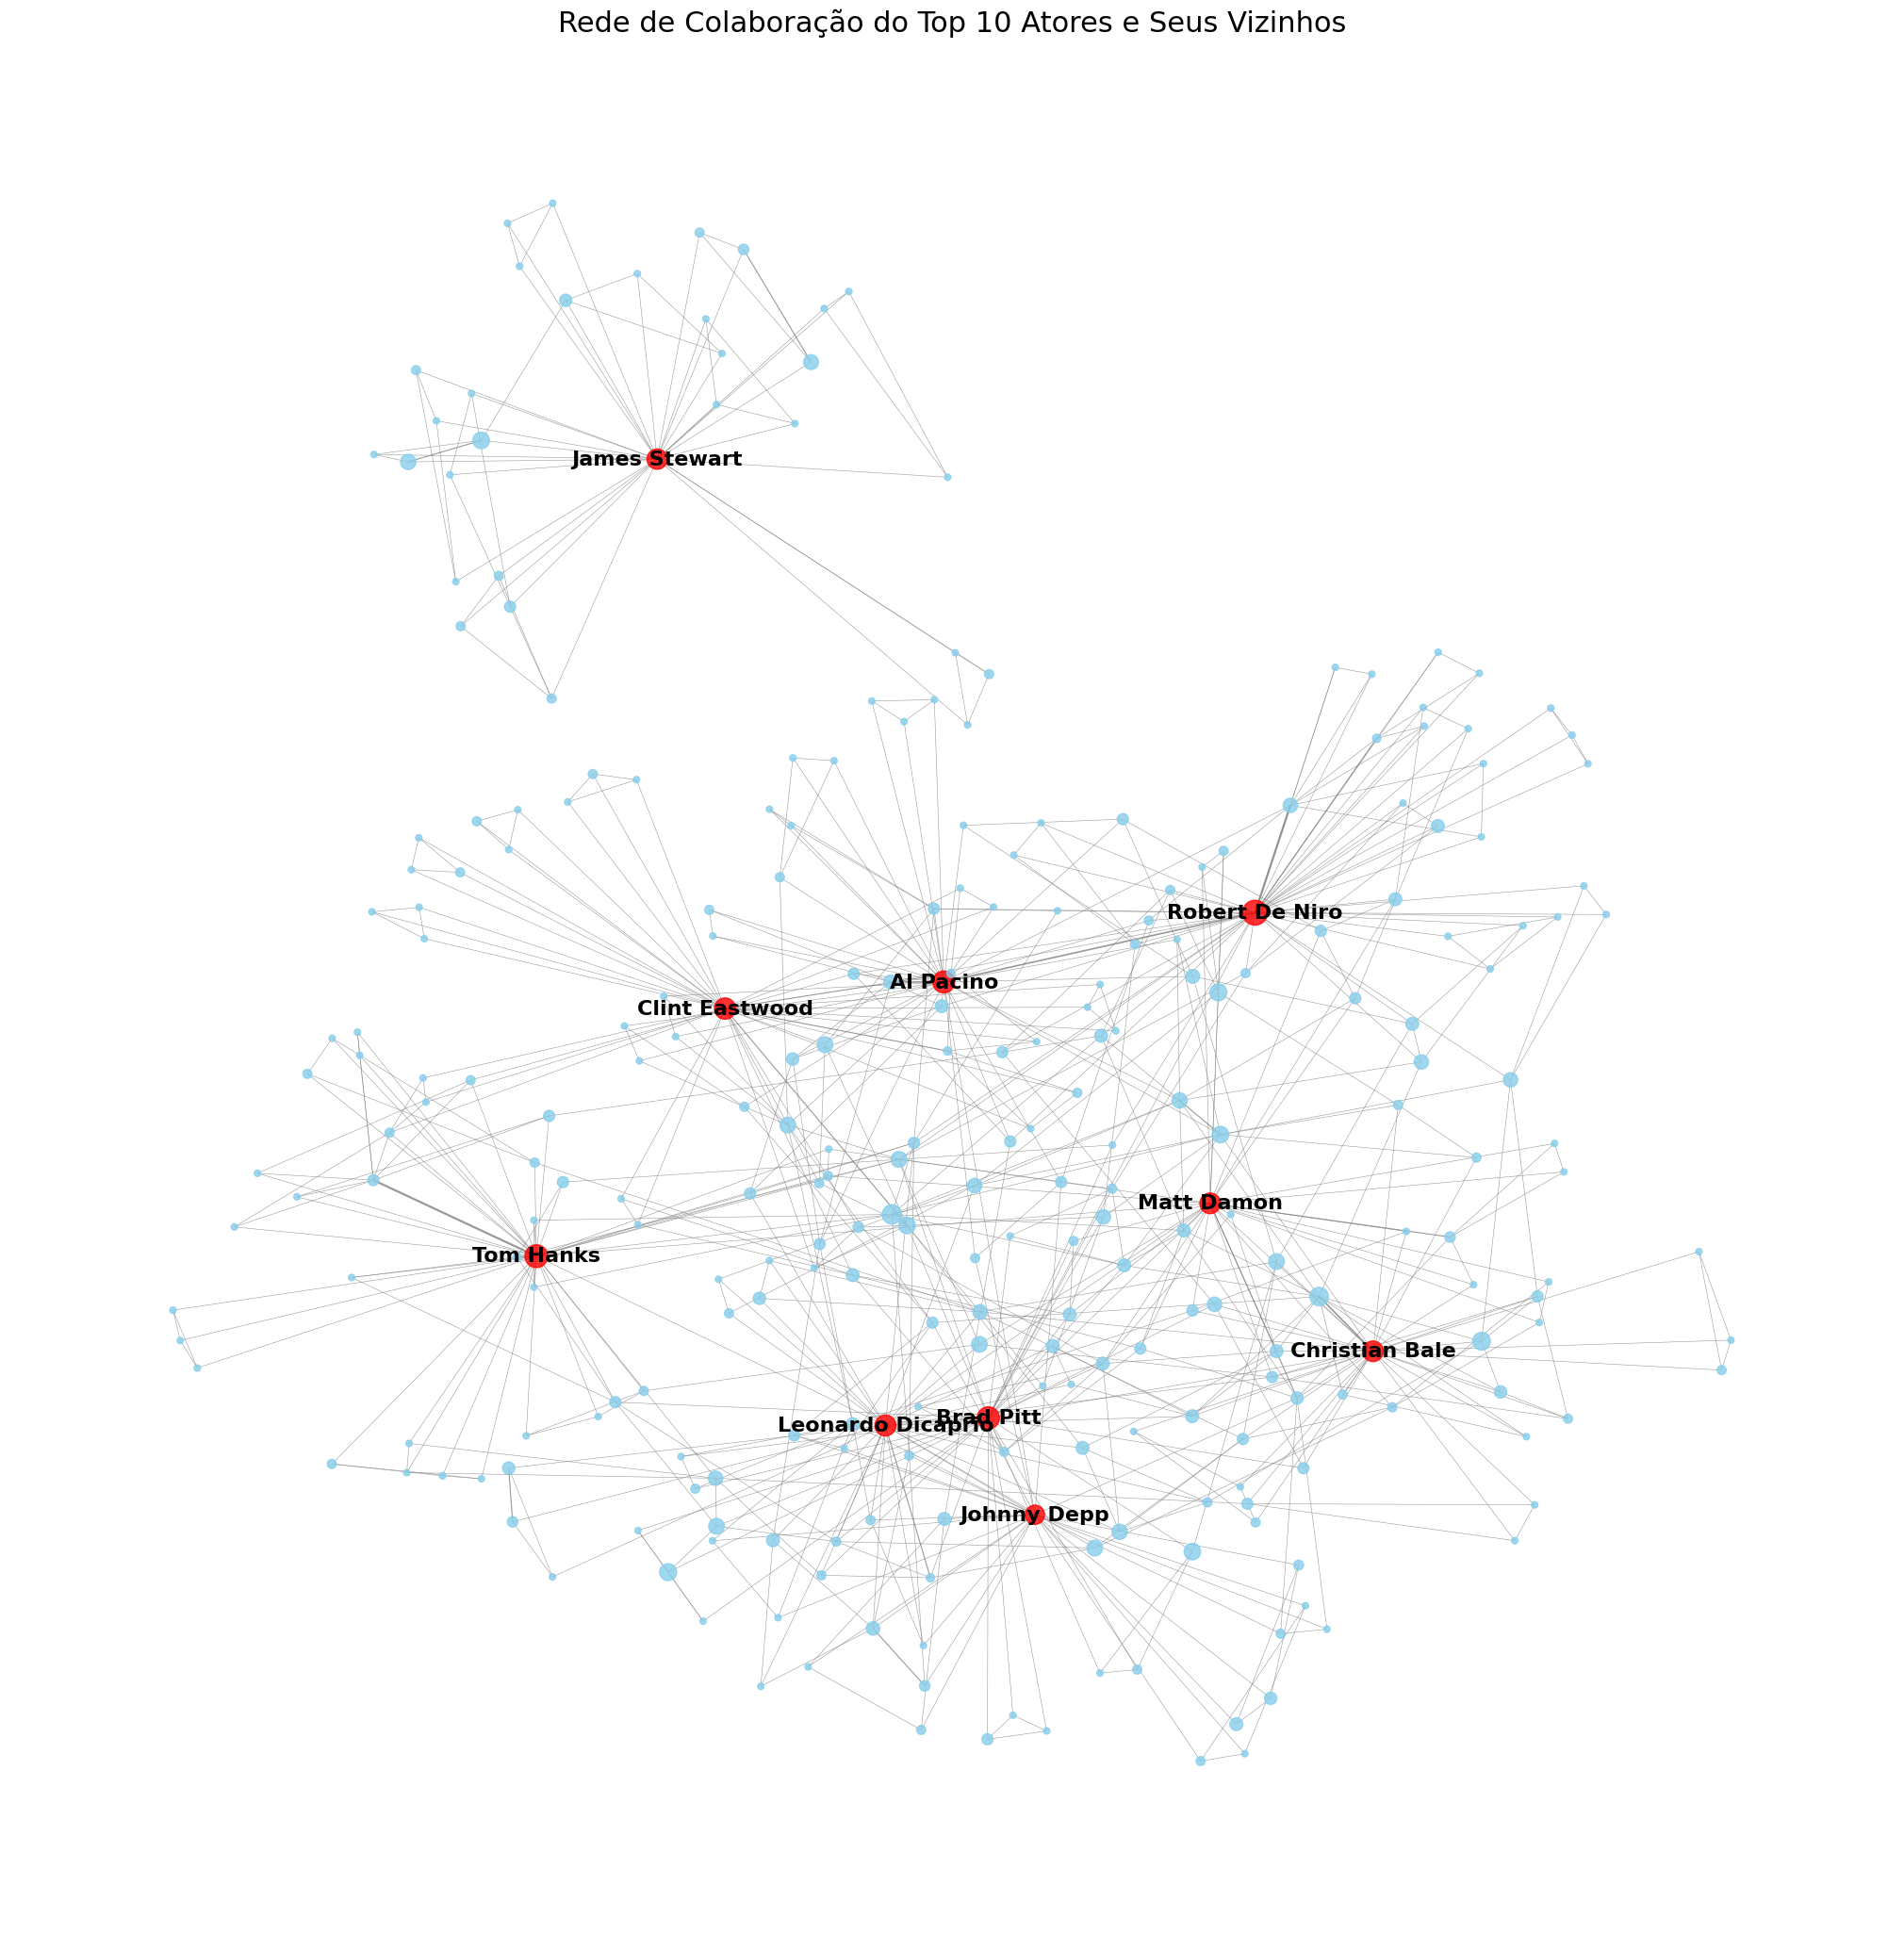

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

# Supondo que 'G_actors' é o seu grafo completo já criado.

print("Preparando o subgrafo com o Top 10 e seus colaboradores...")

# --- PASSO 1: CRIAR O SUBGRAFO DO TOP 10 ---

# Encontrar os 10 nós com maior grau (semelhante ao código anterior)
top_n = 10
top_nodes_data = sorted(G_actors.degree, key=lambda x: x[1], reverse=True)[:top_n]
top_nodes_list = [node for node, degree in top_nodes_data] # Apenas a lista de nomes

# Criar um conjunto (set) para armazenar os nós do nosso subgrafo.
# Usamos um conjunto para evitar duplicatas automaticamente.
nodes_for_subgraph = set(top_nodes_list)

# Para cada um dos top 10 atores, encontrar seus vizinhos e adicioná-los ao conjunto.
for actor in top_nodes_list:
    neighbors = G_actors.neighbors(actor)
    nodes_for_subgraph.update(neighbors)

# Criar o subgrafo contendo apenas os nós que selecionamos.
G_top10 = G_actors.subgraph(nodes_for_subgraph)

print(f"Grafo original: {G_actors.number_of_nodes()} nós.")
print(f"Subgrafo criado: {G_top10.number_of_nodes()} nós.")


# --- PASSO 2: VISUALIZAR O SUBGRAFO (código de visualização adaptado) ---

# Layout calculado apenas para o subgrafo, que é mais rápido.
pos = nx.spring_layout(G_top10, seed=42, k=0.2)

# Tamanho dos nós ainda baseado no grau do grafo ORIGINAL para manter a proporção de importância.
# Isso garante que os top 10 atores continuem sendo os maiores.
node_sizes = [G_actors.degree(n) * 8 for n in G_top10.nodes()]

# Largura das arestas do subgrafo
edge_widths = [d.get('weight', 1) * 0.4 for _, _, d in G_top10.edges(data=True)]

# Dicionário com os rótulos apenas para os top 10
top_labels = {node: node.title() for node in top_nodes_list}

# Coloração: Top 10 em vermelho, seus colaboradores em azul.
node_colors = ["red" if node in top_labels else "skyblue" for node in G_top10.nodes()]

# Plotar o subgrafo
plt.figure(figsize=(20, 20))
nx.draw(
    G_top10,
    pos,
    with_labels=False,
    node_size=node_sizes,
    edge_color="gray",
    width=edge_widths,
    node_color=node_colors,
    alpha=0.8
)

# Adicionar rótulos (nomes) apenas para os top 10
nx.draw_networkx_labels(G_top10, pos, labels=top_labels, font_size=16, font_weight="bold", font_color="black")

plt.title(f"Rede de Colaboração do Top {top_n} Atores e Seus Vizinhos", fontsize=22)
plt.axis("off")
plt.tight_layout()
plt.show()